In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# seaborn
import seaborn as sns

# train-test split
from sklearn.model_selection import train_test_split

# MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# R2_score
from sklearn.metrics import r2_score

pd.set_option('display.max_columns',None)

In [14]:
data = pd.read_csv("data/clean/Agriculture_clean.csv")
data

,state,district,crop,crop_year,season,area,production,yield
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6,3415.0,1.40
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4,2277.0,1.40
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0,3060.0,0.74
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West bengal,Purulia,Wheat,2015,Winter,855.0,1241.0,1.45
345332,West bengal,Purulia,Wheat,2016,Winter,1366.0,2415.0,1.77
345333,West bengal,Purulia,Wheat,2017,Winter,1052.0,2145.0,2.04
345334,West bengal,Purulia,Wheat,2018,Winter,833.0,2114.0,2.54


In [15]:
data.district.value_counts()

district
Bilaspur                   1244
Belagavi                   1197
Tumakuru                   1175
Aurangabad                 1164
Davangere                  1151
                           ... 
Majuli                        2
West karbi anglong            2
Charaideo                     2
Mumbai                        1
South salmara mancachar       1
Name: count, Length: 707, dtype: int64

In [16]:
data.crop_year = data.crop_year.astype(object)
data.dtypes

state          object
district       object
crop           object
crop_year      object
season         object
area          float64
production    float64
yield         float64
dtype: object

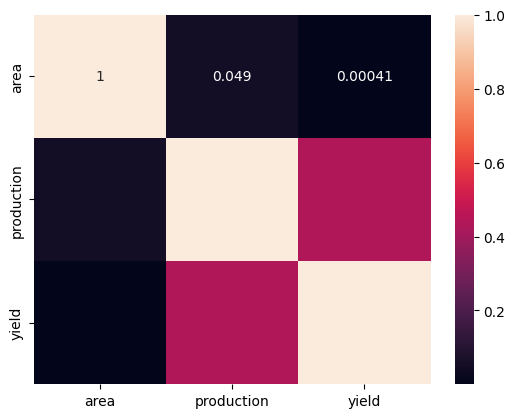

In [17]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(matrix, annot=True)
plt.show()

In [18]:
# Dropping yield column since it is derived column from area and production.

data = data.drop(["yield"], axis = 1)

In [19]:
data.dtypes

state          object
district       object
crop           object
crop_year      object
season         object
area          float64
production    float64
dtype: object

# Splitting X-y

In [20]:
y = data.production
X = data.drop(["production"], axis = 1)

In [21]:
y

0         3415.0
1         2277.0
2         3060.0
3         2660.0
4         3120.0
           ...  
345331    1241.0
345332    2415.0
345333    2145.0
345334    2114.0
345335     931.0
Name: production, Length: 345336, dtype: float64

In [22]:
X

,state,district,crop,crop_year,season,area
0,Andaman and nicobar island,Nicobars,Arecanut,2007,Monsoon,2439.6
1,Andaman and nicobar island,Nicobars,Arecanut,2007,Winter,1626.4
2,Andaman and nicobar island,Nicobars,Arecanut,2008,Monsoon,4147.0
3,Andaman and nicobar island,Nicobars,Arecanut,2008,Summer,4147.0
4,Andaman and nicobar island,Nicobars,Arecanut,2009,Monsoon,4153.0
...,...,...,...,...,...,...
345331,West bengal,Purulia,Wheat,2015,Winter,855.0
345332,West bengal,Purulia,Wheat,2016,Winter,1366.0
345333,West bengal,Purulia,Wheat,2017,Winter,1052.0
345334,West bengal,Purulia,Wheat,2018,Winter,833.0


# train-test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 90)

In [24]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(276268, 6)
(276268,)
(69068, 6)
(69068,)


# Splitting train-test dataset into numericals and categoricals for scaling and encoding¶

In [25]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [26]:
display(X_train_num.shape)
display(X_train_cat.shape)

display(X_test_num.shape)
display(X_test_cat.shape)

(276268, 1)

(276268, 5)

(69068, 1)

(69068, 5)

# Scaling train-test dataset using MinMaxscaler()

In [27]:
# fitting the dataset
transform = MinMaxScaler().fit(X_train_num)

# scaling train-test dataset using same scaler

X_train_scaled = pd.DataFrame(transform.transform(X_train_num), columns = X_train_num.columns)
X_test_scaled = pd.DataFrame(transform.transform(X_test_num), columns = X_test_num.columns)

In [28]:
display(X_train_scaled.shape)
display(X_test_scaled.shape)

(276268, 1)

(69068, 1)

In [29]:
X_train_scaled.head()

,area
0,0.000003
1,0.001379
2,0.000076
3,0.000003
4,0.000125


In [30]:
X_test_scaled.head()

,area
0,0.001314
1,0.000053
2,0.000062
3,0.000001
4,0.000719


# Encoding train-test dataset using OneHotEncoder

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the training data
encoder.fit(X_train_cat)

# Transform the training and test data
X_train_encoded = pd.DataFrame(encoder.transform(X_train_cat), columns=encoder.get_feature_names_out(X_train_cat.columns))
X_test_encoded = pd.DataFrame(encoder.transform(X_test_cat), columns=encoder.get_feature_names_out(X_train_cat.columns))

# Now, X_test_encoded will not raise an error if there are unknown categories in the test set


In [33]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(276268, 824)
(69068, 824)


In [36]:
X_train_encoded.head()

,state_Andaman and nicobar island,state_Andhra pradesh,state_Arunachal pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Dadra and nagar haveli,state_Daman and diu,state_Delhi,state_Goa,state_Gujarat,state_Haryana,state_Himachal pradesh,state_Jammu and kashmir,state_Jharkhand,state_Karnataka,state_Kerala,state_Laddak,state_Madhya pradesh,state_Maharashtra,state_Manipur,state_Meghalaya,state_Mizoram,state_Nagaland,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil nadu,state_Telangana,state_Tripura,state_Uttar pradesh,state_Uttarakhand,state_West bengal,district_Adilabad,district_Agar malwa,district_Agra,district_Ahmadabad,district_Ahmednagar,district_Aizawl,district_Ajmer,district_Akola,district_Alappuzha,district_Aligarh,district_Alipurduar,district_Alirajpur,district_Allahabad,district_Almora,district_Alwar,district_Ambala,district_Ambedkar nagar,district_Amethi,district_Amravati,district_Amreli,district_Amritsar,district_Amroha,district_Anand,district_Anantapur,district_Anantnag,district_Anjaw,district_Anugul,district_Anuppur,district_Araria,district_Aravalli,district_Ariyalur,district_Arwal,district_Ashoknagar,district_Auraiya,district_Aurangabad,district_Azamgarh,district_Badgam,district_Bagalkote,district_Bageshwar,district_Baghpat,district_Bahraich,district_Baksa,district_Balaghat,district_Balangir,district_Baleshwar,district_Ballari,district_Ballia,district_Balod,district_Baloda bazar,district_Balrampur,district_Banas kantha,district_Banda,district_Bandipora,district_Bangalore rural,district_Banka,district_Bankura,district_Banswara,district_Barabanki,district_Baramulla,district_Baran,district_Bareilly,district_Bargarh,district_Barmer,district_Barnala,district_Barpeta,district_Barwani,district_Bastar,district_Basti,district_Bathinda,district_Beed,district_Begusarai,district_Belagavi,district_Bemetara,district_Bengaluru urban,district_Betul,district_Bhadradri,district_Bhadrak,district_Bhagalpur,district_Bhandara,district_Bharatpur,district_Bharuch,district_Bhavnagar,district_Bhilwara,district_Bhind,district_Bhiwani,district_Bhojpur,district_Bhopal,district_Bidar,district_Bijapur,district_Bijnor,district_Bikaner,district_Bilaspur,district_Birbhum,district_Bishnupur,district_Biswanath,district_Bokaro,district_Bongaigaon,district_Botad,district_Boudh,district_Budaun,district_Bulandshahr,district_Buldhana,district_Bundi,district_Burhanpur,district_Buxar,district_Cachar,district_Chamarajanagara,district_Chamba,district_Chamoli,district_Champawat,district_Champhai,district_Chandauli,district_Chandel,district_Chandigarh,district_Chandrapur,district_Changlang,district_Charaideo,district_Charki dadri,district_Chatra,district_Chengalpattu,district_Chennai,district_Chhatarpur,district_Chhindwara,district_Chhotaudepur,district_Chikkaballapura,district_Chikkamagaluru,district_Chirang,district_Chitradurga,district_Chitrakoot,district_Chittoor,district_Chittorgarh,district_Churachandpur,district_Churu,district_Coimbatore,district_Coochbehar,district_Cuddalore,district_Cuttack,district_Dadra and nagar haveli,district_Dakshina kannada,district_Daman,district_Damoh,district_Dang,district_Dantewada,district_Darbhanga,district_Darjeeling,district_Darrang,district_Datia,district_Dausa,district_Davangere,district_Dehradun,district_Delhi_total,district_Deogarh,district_Deoghar,district_Deoria,district_Devbhumi dwarka,district_Dewas,district_Dhalai,district_Dhamtari,district_Dhanbad,district_Dhar,district_Dharmapuri,district_Dharwad,district_Dhemaji,district_Dhenkanal,district_Dholpur,district_Dhubri,district_Dhule,district_Dibang valley,district_Dibrugarh,district_Dima hasao,district_Dimapur,district_Dinajpur dakshin,district_Dinajpur uttar,district_Dindigul,district_Dindori,district_Diu,district_Doda,district_Dohad,district_Dumka,district_Dungarpur,district_Durg,district_East district,district_East garo hills,district_East godavari,district_East jaintia hills,district_East kameng,distri

In [37]:
X_test_encoded.head()

,state_Andaman and nicobar island,state_Andhra pradesh,state_Arunachal pradesh,state_Assam,state_Bihar,state_Chandigarh,state_Chhattisgarh,state_Dadra and nagar haveli,state_Daman and diu,state_Delhi,state_Goa,state_Gujarat,state_Haryana,state_Himachal pradesh,state_Jammu and kashmir,state_Jharkhand,state_Karnataka,state_Kerala,state_Laddak,state_Madhya pradesh,state_Maharashtra,state_Manipur,state_Meghalaya,state_Mizoram,state_Nagaland,state_Odisha,state_Puducherry,state_Punjab,state_Rajasthan,state_Sikkim,state_Tamil nadu,state_Telangana,state_Tripura,state_Uttar pradesh,state_Uttarakhand,state_West bengal,district_Adilabad,district_Agar malwa,district_Agra,district_Ahmadabad,district_Ahmednagar,district_Aizawl,district_Ajmer,district_Akola,district_Alappuzha,district_Aligarh,district_Alipurduar,district_Alirajpur,district_Allahabad,district_Almora,district_Alwar,district_Ambala,district_Ambedkar nagar,district_Amethi,district_Amravati,district_Amreli,district_Amritsar,district_Amroha,district_Anand,district_Anantapur,district_Anantnag,district_Anjaw,district_Anugul,district_Anuppur,district_Araria,district_Aravalli,district_Ariyalur,district_Arwal,district_Ashoknagar,district_Auraiya,district_Aurangabad,district_Azamgarh,district_Badgam,district_Bagalkote,district_Bageshwar,district_Baghpat,district_Bahraich,district_Baksa,district_Balaghat,district_Balangir,district_Baleshwar,district_Ballari,district_Ballia,district_Balod,district_Baloda bazar,district_Balrampur,district_Banas kantha,district_Banda,district_Bandipora,district_Bangalore rural,district_Banka,district_Bankura,district_Banswara,district_Barabanki,district_Baramulla,district_Baran,district_Bareilly,district_Bargarh,district_Barmer,district_Barnala,district_Barpeta,district_Barwani,district_Bastar,district_Basti,district_Bathinda,district_Beed,district_Begusarai,district_Belagavi,district_Bemetara,district_Bengaluru urban,district_Betul,district_Bhadradri,district_Bhadrak,district_Bhagalpur,district_Bhandara,district_Bharatpur,district_Bharuch,district_Bhavnagar,district_Bhilwara,district_Bhind,district_Bhiwani,district_Bhojpur,district_Bhopal,district_Bidar,district_Bijapur,district_Bijnor,district_Bikaner,district_Bilaspur,district_Birbhum,district_Bishnupur,district_Biswanath,district_Bokaro,district_Bongaigaon,district_Botad,district_Boudh,district_Budaun,district_Bulandshahr,district_Buldhana,district_Bundi,district_Burhanpur,district_Buxar,district_Cachar,district_Chamarajanagara,district_Chamba,district_Chamoli,district_Champawat,district_Champhai,district_Chandauli,district_Chandel,district_Chandigarh,district_Chandrapur,district_Changlang,district_Charaideo,district_Charki dadri,district_Chatra,district_Chengalpattu,district_Chennai,district_Chhatarpur,district_Chhindwara,district_Chhotaudepur,district_Chikkaballapura,district_Chikkamagaluru,district_Chirang,district_Chitradurga,district_Chitrakoot,district_Chittoor,district_Chittorgarh,district_Churachandpur,district_Churu,district_Coimbatore,district_Coochbehar,district_Cuddalore,district_Cuttack,district_Dadra and nagar haveli,district_Dakshina kannada,district_Daman,district_Damoh,district_Dang,district_Dantewada,district_Darbhanga,district_Darjeeling,district_Darrang,district_Datia,district_Dausa,district_Davangere,district_Dehradun,district_Delhi_total,district_Deogarh,district_Deoghar,district_Deoria,district_Devbhumi dwarka,district_Dewas,district_Dhalai,district_Dhamtari,district_Dhanbad,district_Dhar,district_Dharmapuri,district_Dharwad,district_Dhemaji,district_Dhenkanal,district_Dholpur,district_Dhubri,district_Dhule,district_Dibang valley,district_Dibrugarh,district_Dima hasao,district_Dimapur,district_Dinajpur dakshin,district_Dinajpur uttar,district_Dindigul,district_Dindori,district_Diu,district_Doda,district_Dohad,district_Dumka,district_Dungarpur,district_Durg,district_East district,district_East garo hills,district_East godavari,district_East jaintia hills,district_East kameng,distri

# Concatenating the processed train-test dataset

In [38]:
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis = 1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis = 1)

In [39]:
display(X_train_processed.shape)
display(X_test_processed.shape)

(276268, 825)

(69068, 825)

# Regression Models

# LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [41]:
LR_model.fit(X_train_processed,y_train)

LinearRegression()

In [42]:
y_pred = LR_model.predict(X_test_processed)
y_pred_train = LR_model.predict(X_train_processed)

In [43]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [44]:
rmse

185751279240928.3

In [45]:
from sklearn.metrics import r2_score

print("Test r2 square", r2_score(y_test, y_pred))
print("Train r2 square", r2_score(y_train, y_pred_train))

Test r2 square -100055041320439.25
Train r2 square 0.24741899824409386


# KNeighborsRegressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors = 3)

In [47]:
KNN_model.fit(X_train_processed,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Takes lot of time to compile

print("KNN Test score is: ", KNN_model.score(X_test_processed, y_test))
print("KNN Train score is: ", KNN_model.score(X_train_processed, y_train))

KNN Test score is:  0.9643026663914636


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth = 5)

In [ ]:
tree_model.fit(X_train_processed,y_train)

In [ ]:
print("Decision Tree Regressor Test score is: ", tree_model.score(X_test_processed, y_test))
print("Decision Tree Regressor Train score is: ", tree_model.score(X_train_processed, y_train))

In [ ]:
y_pred_test_tree = tree_model.predict(X_test_processed)
y_pred_train_tree = tree_model.predict(X_train_processed)

In [ ]:
mse_test = mean_squared_error(y_pred_test_tree, y_test)
mse_train = mean_squared_error(y_pred_train_tree, y_train)

In [ ]:
rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

In [ ]:
print("Decision Tree RMSE test: ", rmse_test)
print("Decision Tree RMSE train: ", rmse_train)

In [ ]:
print("Test r2 square", r2_score(y_test, y_pred_test_tree))
print("Train r2 square", r2_score(y_train, y_pred_train_tree))

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(max_depth=16, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8,
                             random_state = 42)

In [ ]:
forest_regressor.fit(X_train_processed,y_train)

In [ ]:
print("Random Forest Regressor Test score is: ", forest_regressor.score(X_test_processed, y_test))
print("Random Forest Regressor Train score is: ", forest_regressor.score(X_train_processed, y_train))

In [ ]:
y_pred_test_forest = forest_regressor.predict(X_test_processed)
y_pred_train_forest = forest_regressor.predict(X_train_processed)

In [ ]:
mse_test_forest = mean_squared_error(y_pred_test_forest, y_test)
mse_train_forest = mean_squared_error(y_pred_train_forest, y_train)

In [ ]:
rmse_test_forest = np.sqrt(mse_test_forest)
rmse_train_forest = np.sqrt(mse_train_forest)

In [ ]:
print("Random Forest RMSE test: ", rmse_test_forest)
print("Random Forest RMSE train: ", rmse_train_forest)

In [ ]:
print("Test r2 square", r2_score(y_test, y_pred_test_forest))
print("Train r2 square", r2_score(y_train, y_pred_train_forest))